<a href="https://colab.research.google.com/github/talayea/Churned_Customer/blob/main/CenterTrack-Tracking-Objects-as-Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CenterTrack - Tracking Objects as Points
Simultaneous object detection and tracking using center points:
<img src="https://github.com/xingyizhou/CenterTrack/raw/master/readme/fig2.png">

**Original code :** [CenterTrack](https://github.com/xingyizhou/CenterTrack) by [Xingyi Zhou](https://github.com/xingyizhou)

**[Tracking Objects as Points](http://arxiv.org/abs/2004.01177)**,

Xingyi Zhou, Vladlen Koltun, Philipp Krähenbühl,

*arXiv technical report [(arXiv 2004.01177)](http://arxiv.org/abs/2004.01177)*

**Citation**
```
@article{zhou2020tracking,
  title={Tracking Objects as Points},
  author={Zhou, Xingyi and Koltun, Vladlen and Kr{\"a}henb{\"u}hl, Philipp},
  journal={ECCV},
  year={2020}
}
```

In [1]:
! nvidia-smi14
!/usr/local/cuda/bin/nvcc --version

/bin/bash: line 1: nvidia-smi14: command not found
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


## Installation
1. Install PyTorch:

In [3]:
import torch
print(torch.__version__)

2.5.1+cu124


In [4]:
! pip install torch==1.4.0 torchvision==0.5.0

ERROR: Could not find a version that satisfies the requirement torch==1.4.0 (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==1.4.0


2. Install [COCOAPI](https://github.com/cocodataset/cocoapi):

In [5]:
! pip install cython; pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-q__0g6gf
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-q__0g6gf
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp311-cp311-linux_x86_64.whl size=399218 sha256=c681ac2e369975dc4c58d7ab4ebffed42ae1f424208f4292c3f5ad8b1171f5da
  Stored in directory: /tmp/pip-ephem-wheel-cache-9oxd6std/wheels/6d/69/75/358c50a37672dfda8d74ba3b30ec49fb75d52f7c081886d503
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8


3. Clone this repo:

In [6]:
CenterTrack_ROOT="CenterTrack"
! git clone --recursive https://github.com/xingyizhou/CenterTrack $CenterTrack_ROOT
%cd CenterTrack

Cloning into 'CenterTrack'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 293 (delta 1), reused 2 (delta 0), pack-reused 285 (from 1)
Receiving objects: 100% (293/293), 15.02 MiB | 11.97 MiB/s, done.
Resolving deltas: 100% (110/110), done.
/content/CenterTrack


You can manually install the [submodules](https://github.com/xingyizhou/CenterTrack/blob/master/.gitmodules) if you forget --recursive.

4. Install the requirements

In [7]:
! pip install -r requirements.txt
! apt-get install libx264-dev

  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement scikit-learn==0.22.2 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1.3.0, 1.3.1, 1.3.2, 1.4.0rc1, 1.4.0, 1.4.1.post1, 1.4.2, 1.5.0rc1, 1.5.0, 1.5.1, 1.5.2, 1.6.0rc1, 1.6.0, 1.6.1)
ERROR: No matching distribution found for scikit-learn==0.22.2
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libx264-dev
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 659 kB of archives.
After this operation, 2,827 kB of additiona

In [8]:
%ls src/lib/model/networks/

backbones/  base_model.py  dla.py  dlav0.py  generic_network.py  necks/  resdcn.py  resnet.py


In [9]:
#%rm -r src/lib/model/networks/DCNv2

5. Compile deformable convolutional (from DCNv2).

In [15]:
!git clone https://github.com/CharlesShang/DCNv2/

Cloning into 'DCNv2'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 214 (delta 64), reused 49 (delta 49), pack-reused 137 (from 1)
Receiving objects: 100% (214/214), 1.40 MiB | 1.20 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [14]:
# clone if it is not automatically downloaded by `--recursive`.
%%shell

%cd /content/CenterTrack/src/lib/model/networks
!git clone https://github.com/CharlesShang/DCNv2/
%cd DCNv2/
./make.sh

/bin/bash: line 2: fg: no job control
/bin/bash: line 3: !git: command not found
/bin/bash: line 4: fg: no job control
/bin/bash: line 5: ./make.sh: No such file or directory


CalledProcessError: Command '
%cd /content/CenterTrack/src/lib/model/networks
!git clone https://github.com/CharlesShang/DCNv2/
%cd DCNv2/
./make.sh
' returned non-zero exit status 127.

6. Download pertained models for [monocular 3D tracking](https://drive.google.com/open?id=1e8zR1m1QMJne-Tjp-2iY_o81hn2CiQRt), [80-category tracking](https://drive.google.com/open?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40), or [pose tracking](https://drive.google.com/open?id=1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40) and move them to
`$CenterTrack_ROOT/models/`.

  More models can be found in [Model zoo](https://github.com/xingyizhou/CenterTrack/blob/master/readme/MODEL_ZOO.md).

In [16]:
%mkdir models
#! gdown --id 1e8zR1m1QMJne-Tjp-2iY_o81hn2CiQRt -O models/nuScenes_3Dtracking.pth
#! gdown --id 1tJCEJmdtYIh8VuN8CClGNws3YO7QGd40 -O models/coco_tracking.pth
#! gdown --id 1H0YvFYCOIZ06EzAkC2NxECNQGXxK27hH -O models/coco_pose_tracking.pth
! gdown --id 1sf1bWJ1LutwQ_wp176nd2Y3HII9WeFf0 -O models/mot17_half.pth
! gdown --id 1h_8Ts11rf0GQ4_n6FgmCeBuFcWrRjJfa -O models/mot17_fulltrain.pth

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1sf1bWJ1LutwQ_wp176nd2Y3HII9WeFf0

but Gdown can't. Please check connections and permissions.
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with

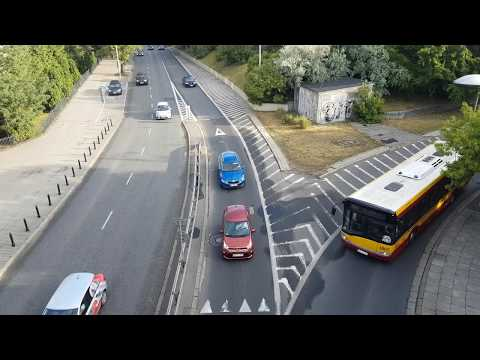

In [17]:
#!pip install youtube-dl
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'MNn9qKG2UFI'   # car
#YOUTUBE_ID = 'MNn9qKG2UFI'
#YOUTUBE_ID = '2bKXv_XviFc'    # pedestrian

YouTubeVideo(YOUTUBE_ID)

In [18]:
#! rm -rf youtube.mp4
# download the youtube with the given ID
! youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube2.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
#! ffmpeg -y -loglevel info -i youtube2.mp4 -t 20 pedestrian.avi
! ffmpeg -y -loglevel info -i youtube.mp4 -t 20 road_traffic.mp4

/bin/bash: line 1: youtube-dl: command not found
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-lib

## Use CenterTrack

In [19]:
%cd src/

/content/CenterTrack/src


**Note:**
1. replace "cv2.imshow" in function show_all_image in "debugger.py(/src/lib/utils/)" with "pass"
2. comment out  "cv2.imshow" at line 80 in "demo.py".

Video clip from the [nuScenes dataset](https://www.nuscenes.org/?externalData=all&mapData=all&modalities=Any) in `videos/nuscenes_mini.mp4`. To test monocular 3D tracking on this video, run

In [21]:
!pip install progress

  Using cached progress-1.6.tar.gz (7.8 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9613 sha256=c39cec195d225be79d95adf5e097d95ff3258fa4bbc14b7bd76eb48136d24c59
  Stored in directory: /root/.cache/pip/wheels/b5/b9/86/f1bcc2a1de592673c4192d9459c0da1100d70212f38b6bd2a4
Successfully built progress


In [22]:
! python demo.py tracking,ddd --load_model ../models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo ../videos/nuscenes_mini.mp4 --test_focal_length 633 --save_video --video_h 480 --video_w 720 --debug 2
#! python demo.py tracking,ddd --load_model ../models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo road_traffic.avi --save_video

import DCN failed
Import DCN failed
Traceback (most recent call last):
  File "/content/CenterTrack/src/demo.py", line 14, in <module>
    from detector import Detector
  File "/content/CenterTrack/src/lib/detector.py", line 13, in <module>
    from model.model import create_model, load_model
  File "/content/CenterTrack/src/lib/model/model.py", line 14, in <module>
    from .networks.generic_network import GenericNetwork
  File "/content/CenterTrack/src/lib/model/networks/generic_network.py", line 9, in <module>
    from .backbones.mobilenet import MobileNetV2
  File "/content/CenterTrack/src/lib/model/networks/backbones/mobilenet.py", line 14, in <module>
    from torchvision.models.utils import load_state_dict_from_url
ModuleNotFoundError: No module named 'torchvision.models.utils'


You will need to specify test_focal_length for monocular 3D tracking demo to convert the image coordinate system back to 3D. The value 633 is half of a typical focal length (~1266) in nuScenes dataset in input resolution 1600x900. The mini demo video is in an input resolution of 800x448, so we need to use a half focal length. You don't need to set the test_focal_length when testing on the original nuScenes data.

Similarly, for 80-category tracking on images/ video, run:

In [ ]:
! python demo.py tracking --load_model ../models/coco_tracking.pth --demo road_traffic.mp4

If you want to test with person tracking models, you need to add --num_class 1:

In [ ]:
! python demo.py tracking --load_model ../models/mot17_half.pth --num_class 1 --demo pedestrian.avi --save_video
#! python demo.py tracking --load_model ../models/mot17_fulltrain.pth --num_class 1 --demo pedestrian.avi --save_video --debug 2

You can add --debug 2 to visualize the heatmap and offset predictions.

In [ ]:
! python demo.py tracking --load_model ../models/mot17_half.pth --num_class 1 --debug 2 --demo video.mp4

For monocular 3D tracking, run

In [ ]:
! python demo.py tracking,ddd --demo ../road_traffic.mp4 --load_model ../models/coco_tracking.pth --save_video

Similarly, for pose tracking, run:

In [ ]:
! python demo.py tracking,multi_pose --load_model ../models/coco_pose.pth --demo video.mp4

## Training on custom dataset
If you want to train CenterTrack on your own dataset, you can use `--dataset custom` and manually specify the annotation file, image path, input resolutions, and number of categories. You still need to create the annotation files in COCO format (referring to the many `convert_X_to_coco.py` examples in tools). For example, you can use the following command to train on our [mot17 experiment](https://github.com/xingyizhou/CenterTrack/blob/master/experiments/mot17_half_sc.sh) without using the pre-defined mot dataset file:

In [ ]:
! python main.py tracking --exp_id mot17_half_sc --dataset custom --custom_dataset_ann_path ../data/mot17/annotations/train_half.json --custom_dataset_img_path ../data/mot17/train/ --input_h 544 --input_w 960 --num_classes 1 --pre_hm --ltrb_amodal --same_aug --hm_disturb 0.05 --lost_disturb 0.4 --fp_disturb 0.1 --gpus 0

## Benchmark Evaluation and Training
After installation, follow the instructions in [DATA.md](https://github.com/xingyizhou/CenterTrack/blob/master/readme/DATA.md) to setup the datasets. Then check [GETTING_STARTED.md](https://github.com/xingyizhou/CenterTrack/blob/master/readme/GETTING_STARTED.md) to reproduce the results in the paper. We provide scripts for all the experiments in the [experiments folder](https://github.com/xingyizhou/CenterTrack/blob/master/experiments).

### **Benchmark evaluation**
First, download the models you want to evaluate from our model zoo and put them in CenterTrack_ROOT/models/.

**MOT17**

To test the tracking performance on MOT17 with our pretrained model, run

In [ ]:
! python test.py tracking --exp_id mot17_half --dataset mot --dataset_version 17halfval --pre_hm --ltrb_amodal --track_thresh 0.4 --pre_thresh 0.5 --load_model ../models/mot17_half.pth

This will give a MOTA of `66.1` if set up correctly. `--pre_hm` is to enable the input heatmap. `--ltrb_amodal` is to use the left, top, right, bottom bounding box representation to enable detecting out-of-image bounding box (We observed this is important for MOT datasets). And `--track_thresh` and `--pre_thresh` are the score threshold for predicting a bounding box ($\theta$ in the paper) and feeding the heatmap to the next frame ($\tau$ in the paper), respectively.

To test with public detection, run

In [ ]:
! python test.py tracking --exp_id mot17_half_public --dataset mot --dataset_version 17halfval --pre_hm --ltrb_amodal --track_thresh 0.4 --pre_thresh 0.5 --load_model ../models/mot17_half.pth --public_det --load_results ../data/mot17/results/val_half_det.json

The expected MOTA is `63.1`.

To test on the test set, run

### Training
We have packed all the training scripts in the [experiments folder](https://github.com/xingyizhou/CenterTrack/blob/master/experiments). The experiment names correspond to the model name in the [model zoo](https://github.com/xingyizhou/CenterTrack/blob/master/experiments). The number of GPUs for each experiment can be found in the scripts and the model zoo. If the training is terminated before finishing, you can use the same command with `--resume` to resume training. It will found the latest model with the same `exp_id`. Some experiments rely on pretraining on another model. In this case, download the pretrained model from our model zoo or train that model first.